https://www.stat.cmu.edu/~ryantibs/advmethods/notes/kernel.pdf

### Linear smoother

In [32]:
from matplotlib import pyplot as plt

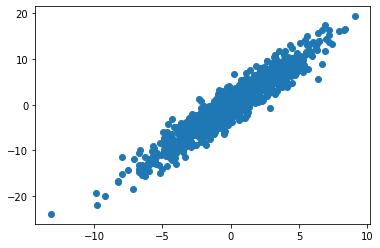

In [85]:


N = 1000
m = 3

def generate(N, ):
    X = np.random.normal(0, 3, N)
    y_clear = X*2
    y = y_clear + np.random.normal(0, 2, size=N)
    return X, y, y_clear

X_train, y_train, y_train_c = generate(N)
X_test, y_test, y_test_c = generate(N)
plt.scatter(X_train, y_train)

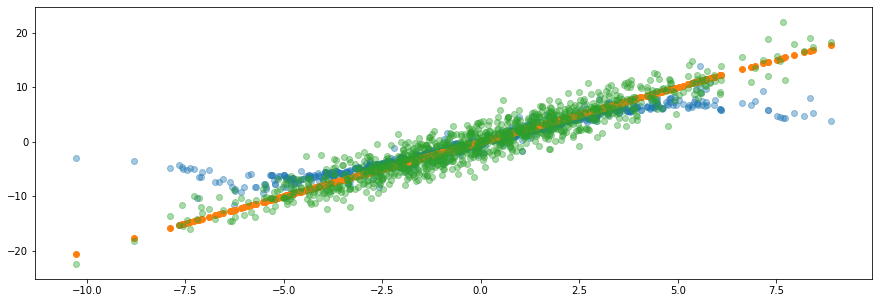

In [93]:
import numpy as np
import pandas as pd


class LinearSmoother:
    def fit(self, X, y):
#         self.
        self.y_ = y
        self.samples_ = X
    
    def predict(self, X):
        preds = []
        for i in range(len(X)):
            y_hat = self.predict_one(X[i])
            preds.append(y_hat)
        return np.array(preds)
    
    def predict_one(self, x):
        weights = []
        for i in range(self.samples_.shape[0]):
            score = self._calculate_weight(x, self.samples_[i])
            weights.append(score)
        weights = np.array(weights)
        weights = weights/weights.sum()
        pred = (weights * self.y_.ravel()).sum()
        return pred
    
    
class KNeighbors(LinearSmoother):
    def _calculate_weight(self, x, x_i):
        distance = ((x - x_i)**2).sum()**0.5
        return 1/(distance+1e-4)

ls = KNeighbors()
ls.fit(X_train, y_train)


plt.figure(figsize=(11,6))
plt.scatter(X_test, ls.predict(X_test), alpha=0.3)
plt.scatter(X_test, y_test_c)
plt.scatter(X_test, y_test, alpha=0.3)